In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from numpy.linalg import inv

(437, 778)


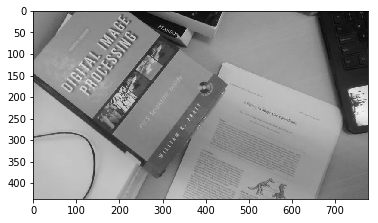

In [2]:
img1 = plt.imread('img1.jpg')
print(img1.shape)
imgplot = plt.imshow(img1)
plt.gray()
plt.show()

In [3]:
def eqsolve(x,y):
    r1 = x
    r2 = x + 1
    c1 = y
    c2 = y + 1
    mata = np.array([[r1 , c1 , r1*c1 , 1],[r1 , c2 , r1 * c2 , 1],[r2 , c1 , r2*c1 , 1],[r2 , c2 , r2*c2 , 1]])
    matI = np.array([[img1[r1][c1]] , [img1[r1][c2]] , [img1[r2][c1]] , [img1[r2][c2]]])
    matinv = inv(mata)
    coeff = np.dot(matinv,matI)
    return coeff

In [4]:
def myresize(img,M,N):
    M = int(M) 
    N = int(N) 
    img2 = np.ones(shape=(M,N))
    imgrows = img.shape[0] - 1
    imgcols = img.shape[1] - 1
    scalrows = imgrows / M
    scalcols = imgcols / N
    for i in range(M):
        for j in range(N):
            newx = i*scalrows
            newy = j*scalcols
            mx = int(newx)
            my = int(newy)
            coeff = eqsolve(mx,my)
            img2[i][j] = int(coeff[0] * newx + coeff[1] * newy + coeff[2] * newx * newy + coeff[3])
    return img2

Text(0.5, 1.0, 'Original Image')

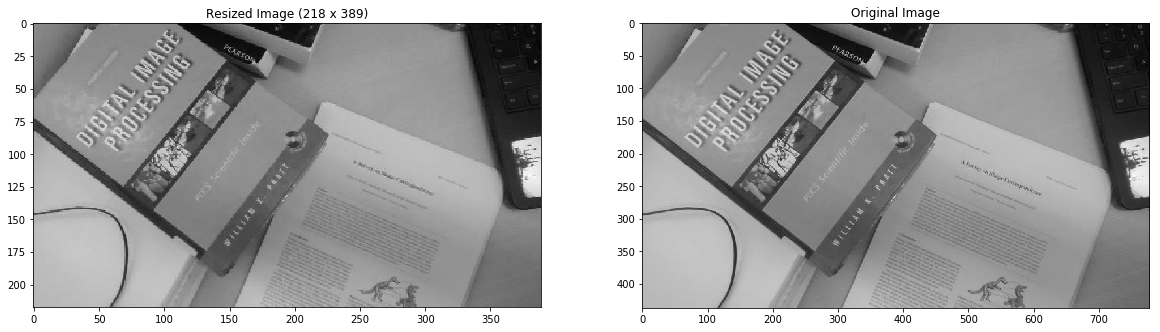

In [5]:
M = 437*0.5
N = 778*0.5
resizeimg = myresize(img1,M,N)
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title("Resized Image (%i x %i)" %(M,N))
plt.imshow(resizeimg)
plt.subplot(122)
plt.imshow(img1)
plt.title("Original Image")